### MODEL IMPORTING

In [329]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

### DATA LOAD

In [332]:
data=pd.read_csv(r"C:\Users\NAVYA\Downloads\TrafficVolumeData.csv")
data

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,02-10-2012 09:00,NaN,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,02-10-2012 10:00,NaN,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,02-10-2012 11:00,NaN,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,02-10-2012 12:00,NaN,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,02-10-2012 13:00,NaN,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33745,17-05-2017 21:00,NaN,74,85,1,328,7,7,287.88,0.0,0.0,90,Mist,mist,2348
33746,17-05-2017 22:00,NaN,81,70,1,24,2,2,286.95,0.0,0.0,90,Rain,heavy intensity rain,2194
33747,17-05-2017 22:00,NaN,138,70,1,24,1,1,286.95,0.0,0.0,90,Mist,mist,2194
33748,17-05-2017 23:00,NaN,229,66,1,42,6,6,285.75,0.0,0.0,90,Rain,heavy intensity rain,1328


### EXPLORATATORY DATA ANALYSIS

In [335]:
data.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,02-10-2012 09:00,NaN,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,02-10-2012 10:00,NaN,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,02-10-2012 11:00,NaN,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,02-10-2012 12:00,NaN,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,02-10-2012 13:00,NaN,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [337]:
data.tail()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
33745,17-05-2017 21:00,NaN,74,85,1,328,7,7,287.88,0.0,0.0,90,Mist,mist,2348
33746,17-05-2017 22:00,NaN,81,70,1,24,2,2,286.95,0.0,0.0,90,Rain,heavy intensity rain,2194
33747,17-05-2017 22:00,NaN,138,70,1,24,1,1,286.95,0.0,0.0,90,Mist,mist,2194
33748,17-05-2017 23:00,NaN,229,66,1,42,6,6,285.75,0.0,0.0,90,Rain,heavy intensity rain,1328
33749,17-05-2017 23:00,NaN,140,63,1,27,8,8,285.75,0.0,0.0,90,Mist,mist,1328


In [339]:
data.describe()

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,traffic_volume
count,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000
mean,154.841422,71.209007,3.378193,199.471852,4.989748,4.989748,280.069587,0.448739,0.000318,50.458785,3240.118163
std,83.735515,16.852248,2.055792,99.841088,2.570021,2.570021,13.415256,53.526500,0.009760,38.871734,1991.487289
min,10.000000,13.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,83.000000,60.000000,2.000000,130.000000,3.000000,3.000000,271.720000,0.000000,0.000000,1.000000,1165.250000
50%,155.000000,72.000000,3.000000,200.000000,5.000000,5.000000,280.150000,0.000000,0.000000,64.000000,3335.000000
75%,228.000000,85.000000,5.000000,290.000000,7.000000,7.000000,290.620000,0.000000,0.000000,90.000000,4926.000000
max,299.000000,100.000000,16.000000,360.000000,9.000000,9.000000,308.240000,9831.300000,0.510000,100.000000,7280.000000


In [341]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            33750 non-null  object 
 1   is_holiday           43 non-null     object 
 2   air_pollution_index  33750 non-null  int64  
 3   humidity             33750 non-null  int64  
 4   wind_speed           33750 non-null  int64  
 5   wind_direction       33750 non-null  int64  
 6   visibility_in_miles  33750 non-null  int64  
 7   dew_point            33750 non-null  int64  
 8   temperature          33750 non-null  float64
 9   rain_p_h             33750 non-null  float64
 10  snow_p_h             33750 non-null  float64
 11  clouds_all           33750 non-null  int64  
 12  weather_type         33750 non-null  object 
 13  weather_description  33750 non-null  object 
 14  traffic_volume       33750 non-null  int64  
dtypes: float64(3), int64(8), object(4)
m

In [343]:
data['date_time'] = pd.to_datetime(data['date_time'], format='%d-%m-%Y %H:%M')
data['hour'] = data['date_time'].dt.hour
data['day_of_week'] = data['date_time'].dt.dayofweek

In [345]:
data.drop('date_time', axis=1, inplace=True)

In [347]:
obj1=LabelEncoder()
obj2=LabelEncoder()

In [349]:
data['weather_type']=obj1.fit_transform(data['weather_type'])
data['weather_description']=obj2.fit_transform(data['weather_description'])

In [351]:
data

,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,hour,day_of_week
0,NaN,121,89,2,329,1,1,288.28,0.0,0.0,40,1,24,5545,9,1
1,NaN,178,67,3,330,1,1,289.36,0.0,0.0,75,1,2,4516,10,1
2,NaN,113,66,3,329,2,2,289.58,0.0,0.0,90,1,19,4767,11,1
3,NaN,20,66,3,329,5,5,290.13,0.0,0.0,90,1,19,5026,12,1
4,NaN,281,65,3,329,7,7,291.14,0.0,0.0,75,1,2,4918,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33745,NaN,74,85,1,328,7,7,287.88,0.0,0.0,90,5,17,2348,21,2
33746,NaN,81,70,1,24,2,2,286.95,0.0,0.0,90,6,9,2194,22,2
33747,NaN,138,70,1,24,1,1,286.95,0.0,0.0,90,5,17,2194,22,2
33748,NaN,229,66,1,42,6,6,285.75,0.0,0.0,90,6,9,1328,23,2


In [353]:
data.shape

(33750, 16)

In [355]:
data.isna().sum()

is_holiday             33707
air_pollution_index        0
humidity                   0
wind_speed                 0
wind_direction             0
visibility_in_miles        0
dew_point                  0
temperature                0
rain_p_h                   0
snow_p_h                   0
clouds_all                 0
weather_type               0
weather_description        0
traffic_volume             0
hour                       0
day_of_week                0
dtype: int64

In [357]:
data.drop(['is_holiday'],axis=1,inplace=True)

In [359]:
data.isna().sum()

air_pollution_index    0
humidity               0
wind_speed             0
wind_direction         0
visibility_in_miles    0
dew_point              0
temperature            0
rain_p_h               0
snow_p_h               0
clouds_all             0
weather_type           0
weather_description    0
traffic_volume         0
hour                   0
day_of_week            0
dtype: int64

### VISUALIZATION

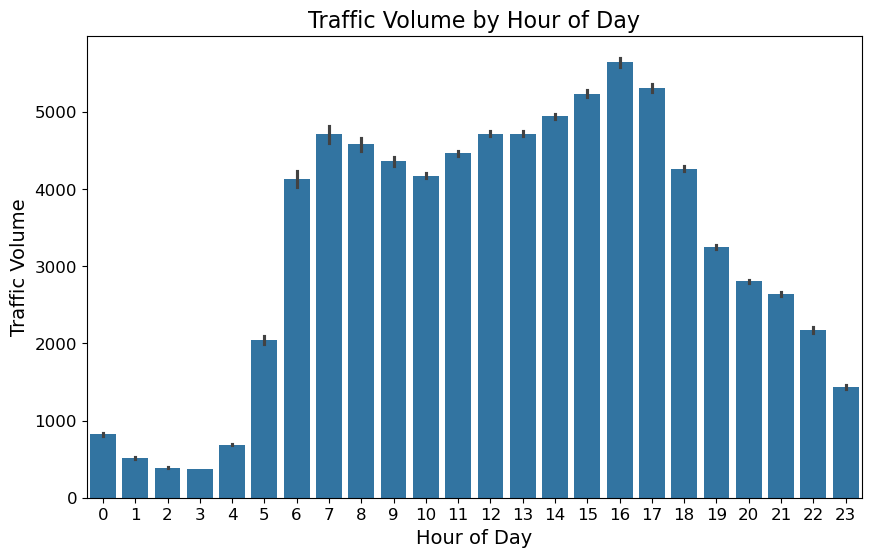

In [362]:
plt.figure(figsize=(10, 6))
sns.barplot(x='hour', y='traffic_volume', data=data)
plt.title('Traffic Volume by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Traffic Volume', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

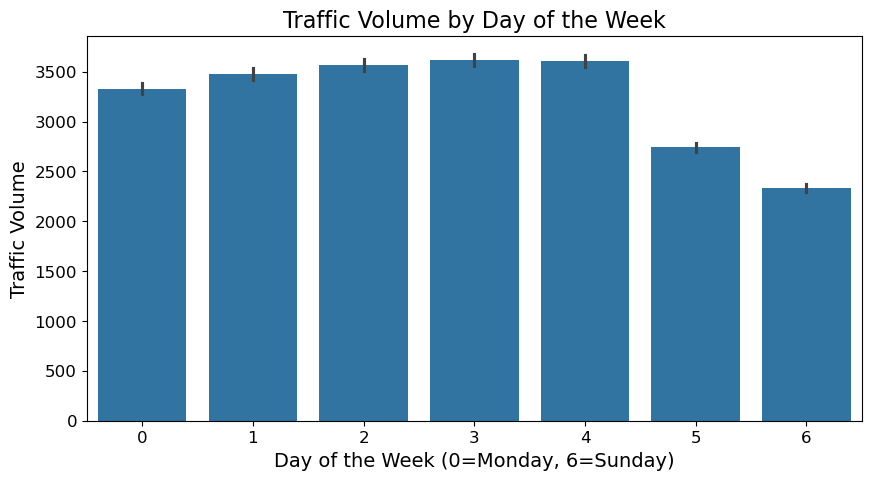

In [363]:

plt.figure(figsize=(10, 5))
sns.barplot(x='day_of_week', y='traffic_volume', data=data)
plt.title('Traffic Volume by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)', fontsize=14)
plt.ylabel('Traffic Volume', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

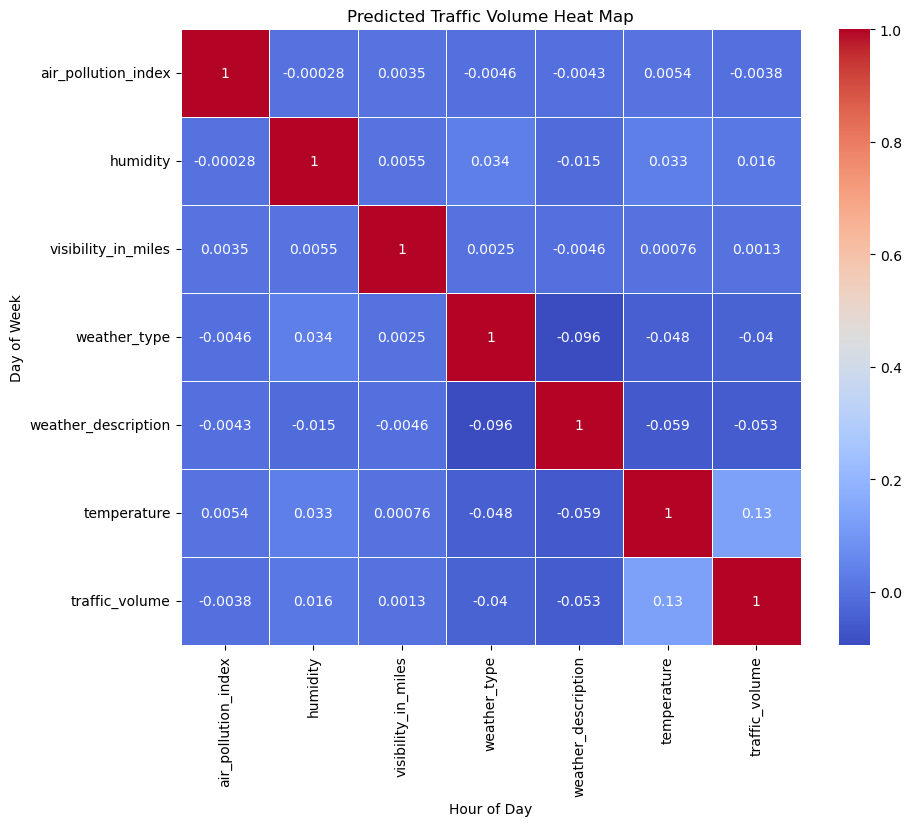

In [365]:
plt.figure(figsize=(10, 8))
corr=data[["air_pollution_index","humidity","visibility_in_miles","weather_type","weather_description","temperature","traffic_volume"]].corr()
sns.heatmap(corr,annot=True,linewidths=0.5,cmap='coolwarm')
plt.title('Predicted Traffic Volume Heat Map')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

In [367]:
x=data.drop('traffic_volume',axis=1)
y=data.traffic_volume

In [370]:
x.head()

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,hour,day_of_week
0,121,89,2,329,1,1,288.28,0.0,0.0,40,1,24,9,1
1,178,67,3,330,1,1,289.36,0.0,0.0,75,1,2,10,1
2,113,66,3,329,2,2,289.58,0.0,0.0,90,1,19,11,1
3,20,66,3,329,5,5,290.13,0.0,0.0,90,1,19,12,1
4,281,65,3,329,7,7,291.14,0.0,0.0,75,1,2,13,1


In [372]:
y.head()

0    5545
1    4516
2    4767
3    5026
4    4918
Name: traffic_volume, dtype: int64

In [374]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [376]:
xtrain.head()

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,hour,day_of_week
28497,63,68,5,270,7,7,279.42,0.0,0.0,5,0,27,16,5
12114,163,78,2,160,6,6,256.34,0.0,0.0,75,1,2,3,6
22225,68,37,3,134,4,4,272.01,0.0,0.0,90,8,16,9,0
9150,99,61,2,275,7,7,292.25,0.0,0.0,0,0,1,8,4
4438,292,85,0,0,4,4,266.02,0.0,0.0,20,1,4,19,3


In [378]:
ytrain.head()

28497    3971
12114     301
22225    5124
9150     5913
4438     3553
Name: traffic_volume, dtype: int64

### MODEL CREATION

### RandomForestRegressor

In [382]:
rf=RandomForestRegressor(n_estimators=100,random_state=42)

In [384]:
rf.fit(xtrain,ytrain)

RandomForestRegressor(random_state=42)

In [385]:
rf_y_pred=rf.predict(xtest)

In [386]:
rf_mse= mean_squared_error(ytest,rf_y_pred)
rf_mse

224588.02094186665

In [390]:
rf_r2= r2_score(ytest,rf_y_pred)
rf_r2

0.9437637779065791

In [392]:
rf_mae=mean_absolute_error(ytest,rf_y_pred)
rf_mae

276.62864

### LinearRegression

In [395]:
model1=LinearRegression()

In [397]:
model1.fit(xtrain,ytrain)

LinearRegression()

In [399]:
ypred=model1.predict(xtest)

In [401]:
mse= mean_squared_error(ytest,ypred)
mse

3346578.073000213

In [403]:
lr_r2= r2_score(ytest,ypred)
lr_r2

0.1620260645382915

In [405]:
lr_mae=mean_absolute_error(ytest,ypred)
lr_mae

1605.0569242773122

### DecisionTreeRegressor

In [408]:
model2=DecisionTreeRegressor()

In [410]:
model2.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [412]:
ypred=model2.predict(xtest)

In [414]:
mse= mean_squared_error(ytest,ypred)
mse

431594.44474074076

In [416]:
r2= r2_score(ytest,ypred)
r2

0.8919299393309608

In [418]:
mae=mean_absolute_error(ytest,ypred)
mae

365.00562962962965

### MAKING SIMPLE PREDICTION SYSTEM

In [421]:
import numpy as np

# Sample input data (ordered as per your model’s expected features)
# Format: (hour, temperature, humidity, wind_speed, visibility_in_miles, rain_p_h, snow_p_h, day_of_week)
input_data = (63,68,5,270,7,7,279.42,0.0,0.0,5,0,27,16,5)

# Convert input data to a numpy array
input_data_as_numpy_array = np.array(input_data)

# Reshape the data as we're predicting for one instance
input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

# Make prediction using your trained model
prediction = rf.predict(input_data_reshape)

print("Predicted Traffic Volume:" ,prediction[0])


Predicted Traffic Volume: 4147.64


In [423]:
# save to pickle file
import pickle

In [425]:
filename='trained_project_model.sav'
pickle.dump(rf,open(filename,'wb'))
loaded_model=pickle.load(open(filename,"rb"))
loaded_model

RandomForestRegressor(random_state=42)

### IMPORT MODULES FOR USER INTERFACE USING GARDIO 

In [428]:
import gradio as gr
import pickle 
import numpy as np

In [431]:
# Save the encoders to files
with open('obj1.pkl', 'wb') as f:
    pickle.dump(obj1, f)

with open('obj2.pkl', 'wb') as f:
    pickle.dump(obj2, f)


In [433]:
import pickle
import numpy as np
import gradio as gr

# Load model
model = pickle.load(open("trained_project_model.sav", "rb"))

# Load label encoders
obj1 = pickle.load(open("obj1.pkl", "rb"))
obj2 = pickle.load(open("obj2.pkl", "rb"))

# Get label options for dropdowns
weather_type_options = obj1.classes_.tolist()
weather_desc_options = obj2.classes_.tolist()

# Define prediction function
def predict_trafficevolume(air_pollution_index, humidity, wind_speed, wind_direction, visibility_in_miles,
        dew_point, temperature, rain_p_h, snow_p_h, clouds_all,
        weather_type_str, weather_description_str, hour, day_of_week):
    
    try:
        # Corrected to use obj1 and obj2
        weather_type = obj1.transform([weather_type_str])[0]
        weather_description = obj2.transform([weather_description_str])[0]
    except ValueError:
        return "Invalid weather type or description. Please select from the dropdown."

    input_data = np.array([
        air_pollution_index, humidity, wind_speed, wind_direction, visibility_in_miles,
        dew_point, temperature, rain_p_h, snow_p_h, clouds_all,
        weather_type, weather_description, hour, day_of_week
    ]).reshape(1, -1)

    prediction = model.predict(input_data)
    return f"Predicted Traffic Volume: {prediction[0]:,.0f}"


# Create Gradio interface
iface = gr.Interface(
    fn=predict_trafficevolume,
    inputs=[
        gr.Number(label="Air Pollution Index"),
        gr.Number(label="Humidity"),
        gr.Number(label="Wind Speed"),
        gr.Number(label="Wind Direction"),
        gr.Number(label="Visibility in Miles"),
        gr.Number(label="Dew Point"),
        gr.Number(label="Temperature"),
        gr.Number(label="Rain per Hour"),
        gr.Number(label="Snow per Hour"),
        gr.Number(label="Clouds (%)"),
        gr.Dropdown(choices=weather_type_options, label="Weather Type"),
        gr.Dropdown(choices=weather_desc_options, label="Weather Description"),
        gr.Slider(0, 23, step=1, label="Hour"),
        gr.Slider(0, 6, step=1, label="Day of Week (0 = Monday, 6 = Sunday)"),
    ],
    outputs="text",
    title="Traffic Volume Prediction",
    description="Enter time and weather details to predict traffic volume using a trained ML model."
)

# Launch the interface
iface.launch()
(63,68,5,270,7,7,279.42,0.0,0.0,5,0,27,16,5)

* Running on local URL:  http://127.0.0.1:7867

To create a public link, set `share=True` in `launch()`.


(63, 68, 5, 270, 7, 7, 279.42, 0.0, 0.0, 5, 0, 27, 16, 5)